# Partie I

### Importer les librairies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
import folium

### Lire les fichiers de graphe avec pandas

In [2]:
transport_nodes=pd.read_csv('data/transport-nodes.csv')
transport_nodes

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [3]:
transport_arcs=pd.read_csv('data/transport-relationships.csv')
transport_arcs

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


### Construire le graphe et le visualiser: la méthode from_pandas_dataframe n'existe plus donc nous la remplaçons par la méthode from_pandas_edgelist

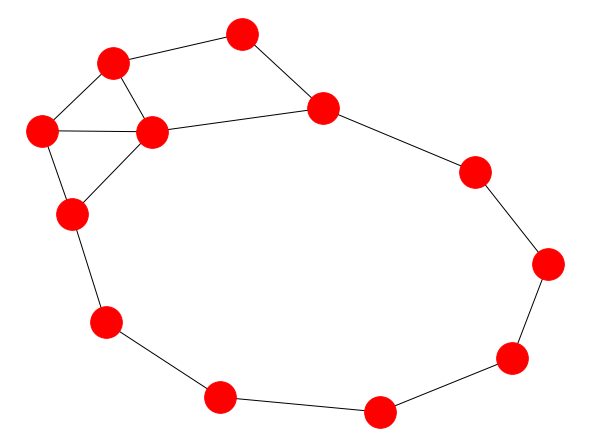

In [5]:
plt.figure(figsize=(8,6))
df=transport_arcs
Graphe=nx.from_pandas_edgelist(df, source='src', target='dst', edge_attr=True)
nx.draw(Graphe, with_labels=None, node_color='red', node_size=1000)
plt.show()

### Attributs

In [6]:
dict(Graphe.node)

{'Amsterdam': {},
 'Utrecht': {},
 'Den Haag': {},
 'Rotterdam': {},
 'Immingham': {},
 'Doncaster': {},
 'London': {},
 'Hoek van Holland': {},
 'Felixstowe': {},
 'Ipswich': {},
 'Colchester': {},
 'Gouda': {}}

### Ajout des attributs latitude et longitude aux noeuds

In [7]:
def ajouterAttribut(myGraphe,dfnoeuds, nomAttribut,nomIndex):
    ide=[i for i in dfnoeuds[nomIndex]]
    attr=[nomAttribut for i in dfnoeuds[nomIndex]]
    val=[i for i in dfnoeuds[nomAttribut]]
    values={c:{c2:v} for c, c2, v in zip(ide, attr, val)}
    #values
    nx.set_node_attributes(Graphe, values)
    #Graphe.node.data()      

In [8]:
ajouterAttribut(Graphe,transport_nodes,'latitude','id')
ajouterAttribut(Graphe,transport_nodes,'longitude','id')
ajouterAttribut(Graphe,transport_nodes,'population','id')

In [9]:
dict(Graphe.node)

{'Amsterdam': {'latitude': 52.379189000000004,
  'longitude': 4.899431,
  'population': 821752},
 'Utrecht': {'latitude': 52.092876000000004,
  'longitude': 5.104480000000001,
  'population': 334176},
 'Den Haag': {'latitude': 52.078663,
  'longitude': 4.288787999999999,
  'population': 514861},
 'Rotterdam': {'latitude': 51.9225,
  'longitude': 4.47917,
  'population': 623652},
 'Immingham': {'latitude': 53.612390000000005,
  'longitude': -0.22219,
  'population': 9642},
 'Doncaster': {'latitude': 53.52285,
  'longitude': -1.13116,
  'population': 302400},
 'London': {'latitude': 51.509865000000005,
  'longitude': -0.118092,
  'population': 8787892},
 'Hoek van Holland': {'latitude': 51.9775,
  'longitude': 4.13333,
  'population': 9382},
 'Felixstowe': {'latitude': 51.96375,
  'longitude': 1.3511,
  'population': 23689},
 'Ipswich': {'latitude': 52.05917, 'longitude': 1.15545, 'population': 133384},
 'Colchester': {'latitude': 51.88921,
  'longitude': 0.9042100000000001,
  'populatio

In [10]:
dict(Graphe.edges)

{('Amsterdam', 'Utrecht'): {'src': 'Amsterdam',
  'dst': 'Utrecht',
  'relationship': 'EROAD',
  'cost': 46},
 ('Amsterdam', 'Den Haag'): {'src': 'Amsterdam',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': 59},
 ('Amsterdam', 'Immingham'): {'src': 'Amsterdam',
  'dst': 'Immingham',
  'relationship': 'EROAD',
  'cost': 369},
 ('Utrecht', 'Gouda'): {'src': 'Gouda',
  'dst': 'Utrecht',
  'relationship': 'EROAD',
  'cost': 35},
 ('Den Haag', 'Rotterdam'): {'src': 'Den Haag',
  'dst': 'Rotterdam',
  'relationship': 'EROAD',
  'cost': 26},
 ('Den Haag', 'Hoek van Holland'): {'src': 'Hoek van Holland',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': 27},
 ('Den Haag', 'Gouda'): {'src': 'Den Haag',
  'dst': 'Gouda',
  'relationship': 'EROAD',
  'cost': 32},
 ('Rotterdam', 'Gouda'): {'src': 'Gouda',
  'dst': 'Rotterdam',
  'relationship': 'EROAD',
  'cost': 25},
 ('Rotterdam', 'Hoek van Holland'): {'src': 'Hoek van Holland',
  'dst': 'Rotterdam',
  'relationship': 'EROAD',


### Représenter les noeuds sur une carte avec folium

In [11]:
basemap = folium.Map(
    location=[52.3791890, 4.899431],
    zoom_start=12,
    tiles='Stamen Toner'
)

In [12]:
basemap

### Ajouter des marqueurs pour tous les noeuds du reseau avec folium.Marker

In [13]:
for i in Graphe.node:
    folium.Marker([Graphe.node[i]['latitude'],Graphe.node[i]['longitude']],tooltip = 'Population: '+str(Graphe.node[i]['population'])+' habitants').add_to(basemap)

In [14]:
basemap

### Coordonnées et celle d'un voisin

In [15]:
def construirePointsImage(myGraphe):
    points = []
    for i in myGraphe.node:
        
        for neighbor in myGraphe.neighbors(i):
            S = []
            S.append([myGraphe.node[i]["latitude"],myGraphe.node[i]["longitude"]])
            S.append([myGraphe.node[neighbor]["latitude"],myGraphe.node[neighbor]["longitude"]])
            points.append(S)
    return points

In [16]:
coordonneesvoisins = construirePointsImage(Graphe)
coordonneesvoisins

[[[52.379189000000004, 4.899431], [52.092876000000004, 5.104480000000001]],
 [[52.379189000000004, 4.899431], [52.078663, 4.288787999999999]],
 [[52.379189000000004, 4.899431], [53.612390000000005, -0.22219]],
 [[52.092876000000004, 5.104480000000001], [52.379189000000004, 4.899431]],
 [[52.092876000000004, 5.104480000000001], [52.01667, 4.70833]],
 [[52.078663, 4.288787999999999], [52.379189000000004, 4.899431]],
 [[52.078663, 4.288787999999999], [51.9225, 4.47917]],
 [[52.078663, 4.288787999999999], [51.9775, 4.13333]],
 [[52.078663, 4.288787999999999], [52.01667, 4.70833]],
 [[51.9225, 4.47917], [52.078663, 4.288787999999999]],
 [[51.9225, 4.47917], [52.01667, 4.70833]],
 [[51.9225, 4.47917], [51.9775, 4.13333]],
 [[53.612390000000005, -0.22219], [52.379189000000004, 4.899431]],
 [[53.612390000000005, -0.22219], [53.52285, -1.13116]],
 [[53.52285, -1.13116], [53.612390000000005, -0.22219]],
 [[53.52285, -1.13116], [51.509865000000005, -0.118092]],
 [[51.509865000000005, -0.118092], 

### Visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes

In [17]:
lignes=folium.PolyLine(locations=coordonneesvoisins,weight=2,color = 'red').add_to(basemap)

In [18]:
basemap

# Partie II

### Implémenter la classe noeud

In [19]:
class Noeud:
    def __init__(self,name):
        self.name = name
        self.attributs = {}
        self.listeNomVoisin = []
        
    def setAttribut(self, key, values):
        self.attributs={k:v for k,v in zip(key, values)}
        return self.attributs
        
    def getAttribut(self,key):
        return self.attributs[key]
    
    def getName(self):
        return self.name
    '''
    Deux noeuds sont egaux s'ils ont même name
    '''
    def egal(self, noeud):
        return self.name==noeud.name

In [20]:
noeud=Noeud('Amsterdam')

In [21]:
noeud.getName()

'Amsterdam'

In [22]:
noeud.setAttribut(["coordonnees", "population"], [[239.45, 79.0], 12000])

{'coordonnees': [239.45, 79.0], 'population': 12000}

In [23]:
equal=Noeud('London')
equal.egal(noeud)

False

##### noeud.attributs

### Implémenter la classe graphe

In [24]:
class Graphe:
    '''
    Les noeuds seront mis dans une liste
    Les arcs forment un dictionnaire avec comme clé les noms des noeuds et comme valeurs une liste de noeud
    '''
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
        self.listeNomVoisin=[]
    '''
    Creer les neouds avec un fichier csv
    On peut mettre tous les noeuds dans une liste
    On doit attribuer à chaque noeud ses attributs: latitude, longitude, population
    On initialise le dictionnaire des arcs en creant la cle avec le nom du noeud et la valeur avec une liste vide
    N'oubliez pas de gerer les exceptions
    '''
    def creerNoeuds(self,fichiernoeuds):
        try:
            with open(fichiernoeuds) as f:
                liste=csv.reader(f)
                en_tete=next(liste)
                noeud=[]
                attr=[]
                pop=[]
                #attributs=[]
                node=[]
                for ligne in liste:
                    noeud.append(ligne[0])
                    attr.append(np.float64(ligne[1:3]))
                    pop.append(ligne[3])
                self.noeuds=noeud
                self.arc={n:[] for n in (noeud)}
                print(f'Column names are {en_tete[0]}, {en_tete[1]}, {en_tete[2]}, {en_tete[3]}')
                print(f'Processed {len(noeud)+1} lines.')
                cle=["coordonnees", "population"]
                #noeuds=[]
                #print(f'Noeuds: {en_tete}')
                #print(f'Attributs: {attr}')
                for i in range(len(noeud)):
                    self.name=noeud[i]
                    #noeuds.append(Noeud.setAttribut(self, cle, attr[i]))
                    #print (f'{noeud[i]}:{Noeud.setAttribut(self,cle, attr[i])}')
                    nom=Noeud(self.name)
                    nom.getName()
                    #nom.getAttribut(key=cle)
                    nom.setAttribut(key=cle, values=[attr[i], int(pop[i])])
                    #attributs.append(Noeud.setAttribut(self, key=cle, values=[attr[i], pop[i]]))
                    node.append(nom)
                    self.noeuds=node
                #self.noeuds=attributs
            return self
        except(IOError, FileNotFoundError):
            print('Fichier non trouvé')
        

        
    '''
    - Creer les arcs avec un  fichier csv
    - Utilisez un dictionnaire pour les arcs
    - N'oubliez pas que le graphe est non oriente.
    - Pour chaque noeud on mettra des tuples dans la liste de ses voisins: (nom du voisin, cout du chemin)
    - Gerer les exceptions
    '''   
    def creerArc(self, fichierarcs):
        try:
            with open(fichierarcs) as f:
                liste=csv.reader(f)
                en_tete=next(liste)
                self.arcs={}
                for ligne in liste:
                    self.arcs[(ligne[0], ligne[1])]={en_tete[0]:ligne[0], en_tete[1]:ligne[1], en_tete[2]:ligne[2], en_tete[3]:ligne[3]}
                    self.listeNomVoisin.append([ligne[0], ligne[1]])
                #print(self.listeNomVoisin[2][0])
                #print(self.arcs)
                print(f'Column names are {en_tete[0]}, {en_tete[1]}, {en_tete[2]}, {en_tete[3]}')
                print(f'Processed {len(self.arcs)+1} lines.')
                return self
        except(IOError, FileNotFoundError):
            print("Fichier non trouvé")
    '''
    Retrouver un noeud à partir de son nom
    '''   
    def getNoeud(self,name):
        a=0
        for i in range(len(self.noeuds)):
            if(self.noeuds[i].name==name):
                return self.noeuds[a]
            else:
                a+=1
        #return self.noeuds[3].name
    '''
    Trouver les noeuds voisins d'un noeud donne
    '''
    def getVoisins(self,noeud):
        voisin=[]
        for j in range(len(self.listeNomVoisin)):
            if(noeud.name==self.listeNomVoisin[j][0]):
                voisin.append((self.listeNomVoisin[j][1], self.listeNomVoisin[j][0]))
        return voisin
    
    '''
    Recuperer pour un noeud donne les latitudes et longitudes de ses voisins
    Constituer des pairs de listes de coordonnées entre le point et ses voisins
    pour une representation sous folium
    
    '''
    def getCoordonnesVoisins(self, noeud):
        listecoord = []
        # voise est un tuple et je veux recuperer le nom du noeud voisin 
        # qui est le premier lement du tuple
        
        for voise in self.getVoisins(noeud):
            # Recupere un noeud voisin
            noeudVoisin = self.getNoeud(voise[0])
            listecoord.append([noeud.getAttribut('coordonnees'),noeudVoisin.getAttribut('coordonnees')])
        return listecoord
    
    '''
    Recuperer les coordonnees d'une liste de neouds pour visualiser sous folium
    Prend en entrée une liste de nom de noeud
    Retourne une liste de sous-listes à deux elements de coordonnées
    '''
    def getListeCoordonnees(self,listeNoeuds):
        coord = []
        for name in listeNoeuds:
            coord.append(self.getNoeud(name).getAttribut('coordonnees'))
        return coord
    
    '''
    Visualiser les noeuds et les arcs sous folium
    Entree: le parametre explored sera utilisé pour les parcours de graphe
    '''
    
    def visualiserFolium(self, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner',explored = None ):
    
        basemap = folium.Map(location= locationpardefaut,zoom_start=6,tiles=tiles)
        
        
        
        for i in self.noeuds:
            
            folium.Marker(i.getAttribut('coordonnees'),tooltip = 'Population '+str(i.getAttribut('population'))).add_to(basemap)
            locations = self.getCoordonnesVoisins(i)
            #print(locations)
            if len(locations)!= 0:
                folium.PolyLine(self.getCoordonnesVoisins(i), color="red", weight=2.5, opacity=1).add_to(basemap)
        if explored != None:
            folium.PolyLine(self.getListeCoordonnees(explored), color="green", weight=2.5, opacity=1).add_to(basemap)
        return basemap

In [25]:
G = Graphe()

In [26]:
G.creerNoeuds('./data/transport-nodes.csv')

Column names are id, latitude, longitude, population
Processed 13 lines.


In [27]:
G.creerArc('./data/transport-relationships.csv')

Column names are src, dst, relationship, cost
Processed 16 lines.


In [28]:
G.getNoeud('Colchester')

In [29]:
G.visualiserFolium()

# Partie III A

### Implémentation de la classe Pile

In [30]:


class Pile():
    '''
    Classe Pile: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les consultations, les insertions, les suppressions se font du même cote
    Dernier arrive premier servi : LIFO
    '''
    def __init__(self):
        self.elements = []
    '''
    Insere un objet en tete de la pile
    '''
    def push(self,noeud):
        self.elements.insert(0,noeud)
    '''
    Retourne True si  un noeud est dans la pile
    '''
    
    def contains_noeud(self, name):
        a=0
        for i in self.elements:
            if(i.name==name):
                a+=1
        return (a!=0)
                
    '''
    Retourne true si la pile est vide
    '''
    def empty(self):
        return (self.elements==[])
    '''
    Retourne et supprime l'element en tete de pile
    Retourne une exception si la pile est vide
    '''
    def remove(self):
        if(self.elements!=[]):
            retour=self.elements[0]
            self.elements.pop(0)
            return retour
        else:
            print('Erreur: Liste vide')


In [31]:
piple=Pile()

In [32]:
piple.push(noeud)

In [33]:
piple.contains_noeud('Amsterdam')

True

In [34]:
piple.remove()

In [35]:
piple.empty()

True

In [36]:
piple.push([43,45])

In [37]:
piple.empty()

False

### Implémentation de la classe File

In [38]:

class File(Pile):
    '''
    Classe File: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les éléments sont enfilés (insérés) du coté arrière et défilés (retirés)
    du coté avant
    Premier arrive premier servi : FIFO
    File et Pile peuvent partager certaines methodes donc utilisez l'heritage pour definir
    la classe File. 
    Normalement vous ne devez changer l'implementation d'une seule methode
    '''
    
    def remove(self):
        pass
        

In [39]:
file=File()

# Partie III B

### ParcoursDFS

In [40]:
'''
Implémenter le parcours en profondeur non recursif entre deux noeuds
Prend en parametre:
- un graphe
- un noeud source
- un noeud destination
Output:
une liste contenant les noms des noeuds explorés pour aller du noeud source vers le noeud destination 
Vous completerez certaines parties du code
'''

def parcoursDFS(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Le nombre de noeuds explorés
        num_explored = 0

        # Initialisation de la frontiere avec le noeud source
        
        frontiere = Pile() 
        frontiere.push(noeudSRC)

        # Initialisation de la liste des noeuds explorés
        explored = set()

        # On boucle jusuq'à trouver la solution
        while True:

            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")
            #print(frontiere.elements)

            # Choisir un node dans la frontiere
            node = frontiere.remove()
            num_explored += 1

            # Si ce noeud est le noeud destination
            if node.egal(noeudDST):
                
                # Ajouter le aux noeuds deja explorés
                explored.add(noeudDST.name)
                
                return explored, num_explored

            # Marquer le noeud comme explore
            explored.add(node.name)

            # Ajouter tous les voisins du noeud à la frontiere
            for n in myGraphe.getVoisins(node):
                
                if not frontiere.contains_noeud(n[0]) and n[0] not in explored:
                    
                    frontiere.push(Noeud(n[0]))
            #print(node.name, noeudDST.name)



In [41]:
# Visualisation des arcs en rouge et visualisation des noeuds parcourus pour aller du premier au deuxieme noeud en vert
G.visualiserFolium(explored = list(parcoursDFS(G,G.noeuds[0],G.noeuds[3])[0]))

#### TODO: Implementer le parcours en profondeur recursif et calculer le coût du chemin

In [42]:
'''
Implémenter le parcours en profondeur recursif entre deux noeuds et calculer le cout

'''

def parcoursDFS_Calcul_Cout(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Le nombre de noeuds explorés
        num_explored = 0

        # Initialisation de la frontiere avec le noeud source
        
        frontiere = Pile() 
        frontiere.push(noeudSRC)

        # Initialisation de la liste des noeuds explorés
        explored = set()

        # On boucle jusuq'à trouver la solution
        while True:

            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")
            #print(frontiere.elements)

            # Choisir un node dans la frontiere
            node = frontiere.remove()
            num_explored += 1

            # Si ce noeud est le noeud destination
            if node.egal(noeudDST):
                
                # Ajouter le aux noeuds deja explorés
                explored.add(noeudDST.name)
                
                return explored, num_explored

            # Marquer le noeud comme explore
            explored.add(node.name)

            # Ajouter tous les voisins du noeud à la frontiere
            for n in myGraphe.getVoisins(node):
                
                if not frontiere.contains_noeud(n[0]) and n[0] not in explored:
                    
                    frontiere.push(Noeud(n[0]))
            #print(node.name, noeudDST.name)



In [43]:
# Visualisation des arcs en rouge et visualisation des noeuds parcourus pour aller du premier au deuxieme noeud en vert
G.visualiserFolium(explored = list(parcoursDFS_Calcul_Cout(G,G.noeuds[2],G.noeuds[2])[0]))

### ParcoursBFS

In [44]:
'''
Implémenter le parcours en largeur non entre deux noeuds
'''

def parcoursBFS(myGraphe,noeudSRC,noeudDST):
    pass
    """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        
